# FBPROPHET MODEL RK PURAM

In [59]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet
import datetime
import plotly.offline as py

In [60]:
import pandas as pd
df_month = pd.read_excel (r'C:/Users/Kira/Desktop/Internship/Data/Delhi_Data-20210529T043217Z-001/Delhi_Data/RK_PURAM_MONTHLY_DATA.xlsx')

In [61]:
df_month.head()

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,2013-01-31,238.402581,440.016129,137.740645,72.304839,261.235161,80.999032,19.117419,6.486774,29.058065
1,2013-02-28,153.191071,310.870357,88.437500,81.714286,195.578929,48.129643,14.771429,1.521786,38.622143
2,2013-03-31,104.222419,206.323871,96.660645,61.831935,185.970000,37.589032,63.851774,1.856129,64.526452
3,2013-04-30,113.373167,251.067667,53.969333,66.616500,132.149833,34.069667,23.560000,2.020333,70.981000
4,2013-05-31,118.867419,317.449355,16.721613,87.684516,102.607419,45.086452,23.457097,2.972903,78.601613


In [62]:
df_month=df_month.reset_index()

In [63]:
df_month.head()

,index,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,0,2013-01-31,238.402581,440.016129,137.740645,72.304839,261.235161,80.999032,19.117419,6.486774,29.058065
1,1,2013-02-28,153.191071,310.870357,88.437500,81.714286,195.578929,48.129643,14.771429,1.521786,38.622143
2,2,2013-03-31,104.222419,206.323871,96.660645,61.831935,185.970000,37.589032,63.851774,1.856129,64.526452
3,3,2013-04-30,113.373167,251.067667,53.969333,66.616500,132.149833,34.069667,23.560000,2.020333,70.981000
4,4,2013-05-31,118.867419,317.449355,16.721613,87.684516,102.607419,45.086452,23.457097,2.972903,78.601613


## PM.25

In [64]:
cols=[df_month["From Date"],df_month["PM2.5"]]
df_PM25=pd.concat(cols,axis=1,keys=["ds","y"])
df_PM25


,ds,y
0,2013-01-31,238.402581
1,2013-02-28,153.191071
2,2013-03-31,104.222419
3,2013-04-30,113.373167
4,2013-05-31,118.867419
...,...,...
91,2020-08-31,15.057097
92,2020-09-30,48.916667
93,2020-10-31,137.285161
94,2020-11-30,222.617000


In [65]:
train=df_PM25.drop(df_PM25.index[-24:])

In [66]:
import pandas as pd
import pystan
print(pystan.__version__)

2.19.1.1


In [67]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)


In [68]:
future=df_PM25.iloc[72:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
72,2019-01-31
73,2019-02-28
74,2019-03-31
75,2019-04-30
76,2019-05-31


In [69]:
forecast = model.predict(future)

In [70]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19,2020-08-31,28.223852,8.685211,47.126107
20,2020-09-30,51.303019,31.487487,71.543670
21,2020-10-31,137.841980,118.478043,157.928819
22,2020-11-30,261.197659,242.146201,281.026387
23,2020-12-31,184.503900,164.759849,205.759186


In [71]:
import matplotlib.pyplot as plt

In [72]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='PM2.5')  # This returns a plotly Figure
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 29.682


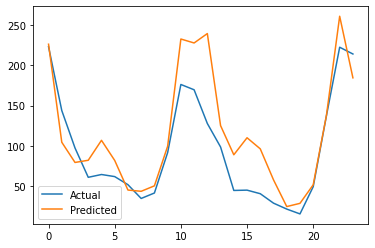

In [73]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_PM25['y'][-24:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [1]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

NameError: name 'y_true' is not defined

In [75]:
import numpy as np
PM25comp=np.asarray([y_pred,y_true])

In [76]:
PM25comp=pd.DataFrame(PM25comp)

In [81]:
PM25comp=PM25comp.transpose()

In [82]:
PM25comp.columns=['Prophet_pred','True']

In [83]:
PM25comp.to_excel("PM25comp.xlsx") 

## PM10

In [18]:
cols=[df_month["From Date"],df_month["PM1"]]
df_PM10=pd.concat(cols,axis=1,keys=["ds","y"])
df_PM10


,ds,y
0,2013-01-31,440.016129
1,2013-02-28,310.870357
2,2013-03-31,206.323871
3,2013-04-30,251.067667
4,2013-05-31,317.449355
...,...,...
91,2020-08-31,43.481290
92,2020-09-30,94.895667
93,2020-10-31,246.180323
94,2020-11-30,321.062667


In [19]:
train=df_PM10.drop(df_PM10.index[-36:])


In [20]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)


In [21]:
future=df_PM10.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [22]:
forecast = model.predict(future)

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,67.191062,43.481060,92.723776
32,2020-09-30,111.175820,86.577127,135.394031
33,2020-10-31,286.276710,262.829924,312.370697
34,2020-11-30,451.069971,426.755226,476.253671
35,2020-12-31,359.415609,335.828558,384.894864


In [24]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='PM10')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 55.684


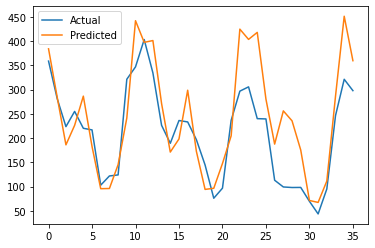

In [25]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_PM10['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

71.1285451133325


In [ ]:
import numpy as np
PM10comp=np.asarray([y_pred,y_true])
PM10comp=pd.DataFrame(PM10comp)

PM10comp=PM10comp.transpose()

PM10comp.columns=['Prophet_pred','True']

PM10comp.to_excel("PM10comp.xlsx") 

## NO

In [27]:
cols=[df_month["From Date"],df_month["NO"]]
df_NO=pd.concat(cols,axis=1,keys=["ds","y"])
df_NO


,ds,y
0,2013-01-31,137.740645
1,2013-02-28,88.437500
2,2013-03-31,96.660645
3,2013-04-30,53.969333
4,2013-05-31,16.721613
...,...,...
91,2020-08-31,10.348387
92,2020-09-30,20.971333
93,2020-10-31,61.755161
94,2020-11-30,105.368333


In [28]:
train=df_NO.drop(df_NO.index[-36:])

In [29]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [30]:
future=df_NO.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [31]:
forecast = model.predict(future)

In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,19.962035,-4.526306,44.414146
32,2020-09-30,27.325621,4.265378,52.526988
33,2020-10-31,114.856492,90.447771,139.952735
34,2020-11-30,163.062930,138.573079,188.450673
35,2020-12-31,122.361276,97.559196,146.121401


In [33]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='NO')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 40.979


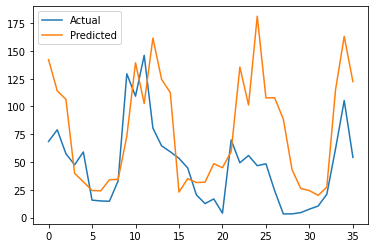

In [34]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_NO['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

50.60544534267555


## NO2

In [36]:
cols=[df_month["From Date"],df_month["NO2"]]
df_NO2=pd.concat(cols,axis=1,keys=["ds","y"])
df_NO2


,ds,y
0,2013-01-31,72.304839
1,2013-02-28,81.714286
2,2013-03-31,61.831935
3,2013-04-30,66.616500
4,2013-05-31,87.684516
...,...,...
91,2020-08-31,23.110000
92,2020-09-30,43.774667
93,2020-10-31,58.697419
94,2020-11-30,78.998333


In [37]:
train=df_NO2.drop(df_NO2.index[-36:])

In [38]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [39]:
future=df_NO2.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [40]:
forecast = model.predict(future)

In [41]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,11.775968,2.609691,20.934315
32,2020-09-30,18.397647,10.049938,27.866687
33,2020-10-31,57.706034,48.167307,66.744947
34,2020-11-30,89.687570,80.471137,98.381612
35,2020-12-31,64.391773,55.615183,73.401354


In [42]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='NO2')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 15.236


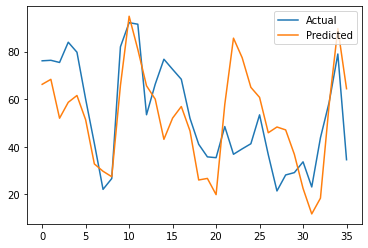

In [43]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_NO2['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

18.558656308673047


## NOx

In [45]:
cols=[df_month["From Date"],df_month["NOx"]]
df_NOx=pd.concat(cols,axis=1,keys=["ds","y"])
df_NOx

,ds,y
0,2013-01-31,261.235161
1,2013-02-28,195.578929
2,2013-03-31,185.970000
3,2013-04-30,132.149833
4,2013-05-31,102.607419
...,...,...
91,2020-08-31,28.620323
92,2020-09-30,40.302667
93,2020-10-31,80.421935
94,2020-11-30,127.303667


In [46]:
train=df_NOx.drop(df_NOx.index[-36:])

In [47]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [48]:
future=df_NOx.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [49]:
forecast = model.predict(future)

In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,42.256653,-2.893807,87.132371
32,2020-09-30,39.156151,-5.121929,83.363861
33,2020-10-31,180.776728,134.577857,224.538445
34,2020-11-30,284.413558,241.207737,325.903401
35,2020-12-31,201.198983,158.955016,250.019352


In [51]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='NOx')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 74.009


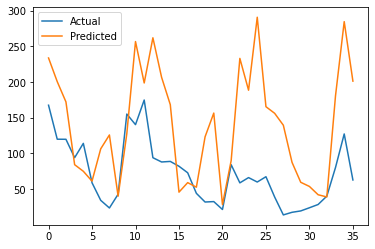

In [52]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_NOx['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

94.04504283254529


## NH3

In [54]:
cols=[df_month["From Date"],df_month["NH3"]]
df_NH3=pd.concat(cols,axis=1,keys=["ds","y"])
df_NH3

,ds,y
0,2013-01-31,80.999032
1,2013-02-28,48.129643
2,2013-03-31,37.589032
3,2013-04-30,34.069667
4,2013-05-31,45.086452
...,...,...
91,2020-08-31,18.224516
92,2020-09-30,22.230333
93,2020-10-31,22.039677
94,2020-11-30,27.741667


In [55]:
train=df_NH3.drop(df_NH3.index[-36:])

In [56]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [57]:
future=df_NH3.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [58]:
forecast = model.predict(future)

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,10.997710,4.493066,17.778569
32,2020-09-30,8.012730,1.146934,14.814735
33,2020-10-31,26.838821,20.002294,33.588394
34,2020-11-30,38.821687,32.221499,45.917037
35,2020-12-31,35.827211,29.418641,42.371791


In [60]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='NH3')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 8.731


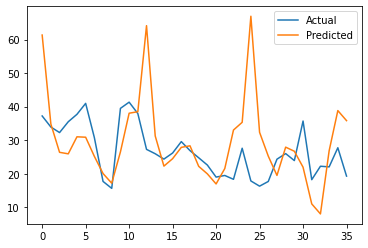

In [61]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_NH3['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

13.331674440565365


## SO2

In [63]:
cols=[df_month["From Date"],df_month["SO2"]]
df_SO2=pd.concat(cols,axis=1,keys=["ds","y"])
df_SO2


,ds,y
0,2013-01-31,19.117419
1,2013-02-28,14.771429
2,2013-03-31,63.851774
3,2013-04-30,23.560000
4,2013-05-31,23.457097
...,...,...
91,2020-08-31,9.794677
92,2020-09-30,15.480667
93,2020-10-31,15.777742
94,2020-11-30,17.005000


In [64]:
train=df_SO2.drop(df_SO2.index[-36:])

In [65]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False,yearly_seasonality='auto')
model.fit(train)

In [66]:
future=df_SO2.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [67]:
forecast = model.predict(future)

In [68]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,13.900750,6.415107,21.457121
32,2020-09-30,18.894818,11.207343,26.041905
33,2020-10-31,28.178780,20.684499,35.344585
34,2020-11-30,38.263394,30.700745,45.660703
35,2020-12-31,39.524411,31.522909,46.549487


In [69]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='SO2')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 16.455


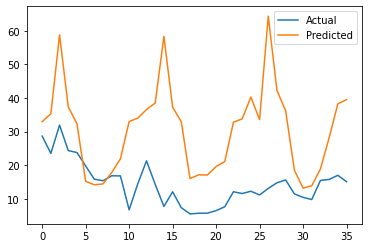

In [70]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_SO2['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

20.370351788941452


## CO

In [72]:
cols=[df_month["From Date"],df_month["CO"]]
df_CO=pd.concat(cols,axis=1,keys=["ds","y"])
df_CO


,ds,y
0,2013-01-31,6.486774
1,2013-02-28,1.521786
2,2013-03-31,1.856129
3,2013-04-30,2.020333
4,2013-05-31,2.972903
...,...,...
91,2020-08-31,0.960323
92,2020-09-30,0.696000
93,2020-10-31,1.136452
94,2020-11-30,1.837000


In [73]:
train=df_CO.drop(df_CO.index[-36:])

In [74]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [75]:
future=df_CO.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [76]:
forecast = model.predict(future)

In [77]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,0.632014,-0.091970,1.258519
32,2020-09-30,0.630833,-0.094063,1.330388
33,2020-10-31,1.768043,1.072386,2.451043
34,2020-11-30,2.422429,1.728126,3.131348
35,2020-12-31,2.001282,1.333004,2.695725


In [78]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='CO')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 0.638


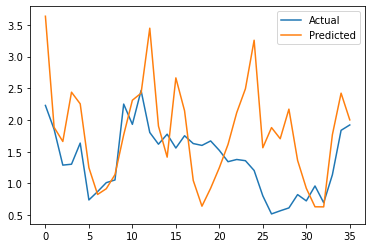

In [79]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_CO['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

0.8175760946745191


## OZONE

In [81]:
cols=[df_month["From Date"],df_month["Ozone"]]
df_ozone=pd.concat(cols,axis=1,keys=["ds","y"])
df_ozone


,ds,y
0,2013-01-31,29.058065
1,2013-02-28,38.622143
2,2013-03-31,64.526452
3,2013-04-30,70.981000
4,2013-05-31,78.601613
...,...,...
91,2020-08-31,27.300968
92,2020-09-30,34.200333
93,2020-10-31,47.390000
94,2020-11-30,40.028000


In [82]:
train=df_ozone.drop(df_ozone.index[-36:])

In [83]:
model = Prophet(daily_seasonality=False,weekly_seasonality=False)
model.fit(train)

In [84]:
future=df_ozone.iloc[60:96]
future=pd.DataFrame(future["ds"])
future.head()

,ds
60,2018-01-31
61,2018-02-28
62,2018-03-31
63,2018-04-30
64,2018-05-31


In [85]:
forecast = model.predict(future)

In [86]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2020-08-31,-4.145043,-15.561488,7.852979
32,2020-09-30,2.053378,-8.986725,13.224875
33,2020-10-31,22.656043,11.875969,33.982569
34,2020-11-30,22.019244,10.797859,34.130672
35,2020-12-31,-0.900353,-12.560053,10.343903


In [87]:
fig = plot_plotly(model, forecast,xlabel='Month', ylabel='ozone')
py.iplot(fig)

Comparison of Actual vs predicted

MAE: 15.544


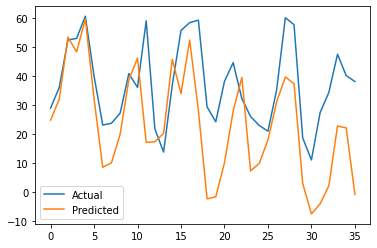

In [88]:
from sklearn.metrics import mean_absolute_error
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_ozone['y'][-36:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred))
print(rmse)

19.20711122383859
